In [384]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [345]:
#Colab derleyicisinden açmak için bu satırı çalıştırın
#from google.colab import files
#uploaded = files.upload()
#import io
#data = pd.read_csv(io.BytesIO(uploaded["NetflixOriginals.csv"]),encoding="latin-1")

In [346]:
data = pd.read_csv("NetflixOriginals.csv")

In [374]:
data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi


                      Language     Runtime
0                 English/Akan  136.000000
1         Khmer/English/French  136.000000
2                      Marathi  121.666667
3               English/Korean  121.000000
4              Spanish/Catalan  116.000000
5                       Korean  115.833333
6                        Hindi  115.787879
7               English/Arabic  114.000000
8                   Indonesian  103.777778
9                      Turkish  101.800000
10                       Malay  101.000000
11                       Tamil  101.000000
12                        Thai  101.000000
13                       Dutch   99.666667
14                      German   99.600000
15                    Filipino   99.500000
16                    Japanese   99.333333
17                      Polish   98.666667
18                     Italian   98.357143
19             Spanish/English   96.000000
20                     Spanish   93.387097
21                      French   92.700000
22         

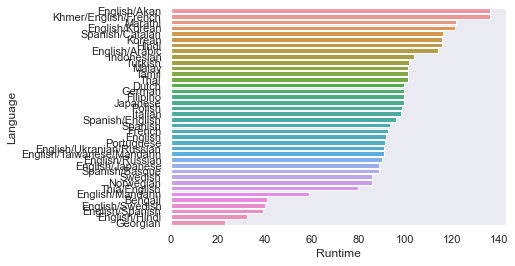

In [348]:
#Veri setine göre uzun soluklu filmlerin dilleri
data.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime", ascending=False)
longfilms = data.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime", ascending=False)
longfilms = longfilms.reset_index()
print(longfilms)

sns.barplot(x=longfilms.loc[(longfilms["Runtime"] >0 )]["Runtime"], y=longfilms["Language"])
plt.show()

In [349]:
data["Premiere"] = pd.to_datetime(data["Premiere"])

In [350]:
#2019 Ocak-2020 Haziran tarihleri arasında "Documentary" türündeki filmler
documentary_2019_2020_imdb=data[(data["Premiere"]>="2019-01-01")&(data["Premiere"]<="2020-07-31")&(data["Genre"]=="Documentary")]
documentary_2019_2020_imdb.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
15,After the Raid,Documentary,2019-12-19,25,4.3,Spanish
20,"Hello Privilege. It's Me, Chelsea",Documentary,2019-09-13,64,4.4,English
30,After Maria,Documentary,2019-05-24,37,4.6,English/Spanish
36,We Are One,Documentary,2020-07-14,86,4.6,French


Text(0.5, 1.0, 'Documentary films & IMDB (January 2019 - June 2020)')

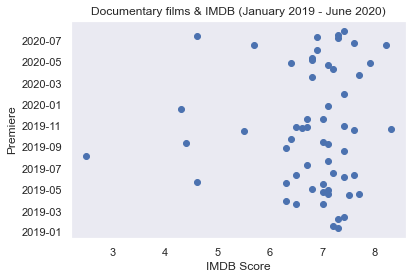

In [351]:
#IMDB GRAFİK
plt.scatter(x="IMDB Score", y="Premiere", data = documentary_2019_2020_imdb)
plt.xlabel("IMDB Score")
plt.ylabel("Premiere")
plt.title("Documentary films & IMDB (January 2019 - June 2020)")

In [352]:
#İngilizce dilinde çekilen en yüksek IMDB puanlı film türü
ing_en_yuksek_imdb = data[data["Language"] == "English"].sort_values(by = "IMDB Score", ascending = False)
ing_en_yuksek_imdb = ing_en_yuksek_imdb.head(1)["Genre"].values[0]
ing_en_yuksek_imdb

'Documentary'

In [353]:
#Hindi dilinde çekilen filmlerin ortalama runtime süresi
hindi_ort_runtime = data[data["Language"] == "Hindi"]["Runtime"].mean()
print(hindi_ort_runtime)

115.78787878787878


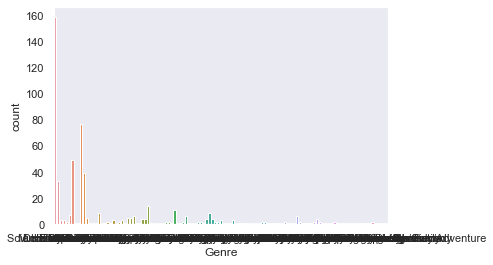

In [354]:
sns.set_theme(style="dark")
ax = sns.countplot(x="Genre", data=data)

In [355]:
#Genre sütunundaki toplam kategori sayısı
data["Genre"].value_counts

<bound method IndexOpsMixin.value_counts of 0                Documentary
1                   Thriller
2      Science fiction/Drama
3            Horror thriller
4                    Mystery
               ...          
579             Concert Film
580              Documentary
581             One-man show
582              Documentary
583              Documentary
Name: Genre, Length: 584, dtype: object>

In [356]:
#Genre sütunundaki benzersiz kategori sayısı
data["Genre"].nunique()

115

In [357]:
#Veri setinde en çok kullanılan 3 dil
diller = data["Language"].value_counts()
diller.head(3)

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

In [358]:
#IMDB puanı en yüksek 10 film
top_ten = data.sort_values(by="IMDB Score", ascending=False)
top_ten.head(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English
577,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English
576,Cuba and the Cameraman,Documentary,2017-11-24,114,8.3,English
573,Klaus,Animation/Christmas/Comedy/Adventure,2019-11-15,97,8.2,English
571,13th,Documentary,2016-10-07,100,8.2,English


In [359]:
data_korelasyon = data.corr()
data_korelasyon

,Runtime,IMDB Score
Runtime,1.000000,-0.040896
IMDB Score,-0.040896,1.000000


Text(0.5, 1.0, 'IMDB Score ile Runtime korelasyonu')

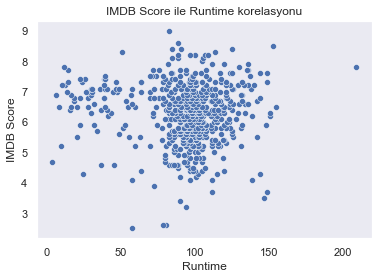

In [360]:
#IMDB puanı ile Runtime arasındaki korelasyon
sns.scatterplot(data=data, x="Runtime", y="IMDB Score")
plt.xlabel("Runtime")
plt.ylabel("IMDB Score")
plt.title("IMDB Score ile Runtime korelasyonu")

In [361]:
top_ten_genre = data.sort_values(by="IMDB Score",ascending=False)
top_ten_genre.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English


In [362]:
top_ten_genre_list = top_ten_genre["Genre"].unique()[:10]

In [363]:
genre_imdb={}
for genre in top_ten_genre_list:
    genre_imdb.update({genre: top_ten_genre[top_ten_genre["Genre"]==genre]["IMDB Score"].max()})

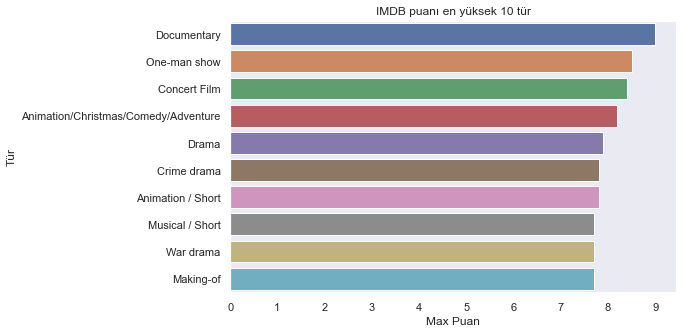

In [386]:
x=list(genre_imdb.values())
y=list(genre_imdb.keys())

plt.figure(figsize=(8,5))
sns.barplot(x,y)
plt.xlabel("Max Puan")
plt.ylabel("Tür")
plt.title("IMDB puanı en yüksek 10 tür")
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.show()

In [365]:
top_ten_runtime = data.sort_values(by="Runtime", ascending = False).head(10)

In [366]:
top_ten_runtime

,Title,Genre,Premiere,Runtime,IMDB Score,Language
561,The Irishman,Crime drama,2019-11-27,209,7.8,English
328,Da 5 Bloods,War drama,2020-06-12,155,6.5,English
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
247,Citation,Drama,2020-11-06,151,6.2,English
284,The Forest of Love,Drama,2019-10-11,151,6.3,Japanese
509,Raat Akeli Hai,Thriller,2020-07-31,149,7.3,Hindi
7,The Last Days of American Crime,Heist film/Thriller,2020-06-05,149,3.7,English
543,Ludo,Anthology/Dark comedy,2020-11-12,149,7.6,Hindi
194,Army of the Dead,Zombie/Heist,2021-05-21,148,5.9,English
5,Drive,Action,2019-11-01,147,3.5,Hindi


<AxesSubplot:xlabel='Runtime', ylabel='Title'>

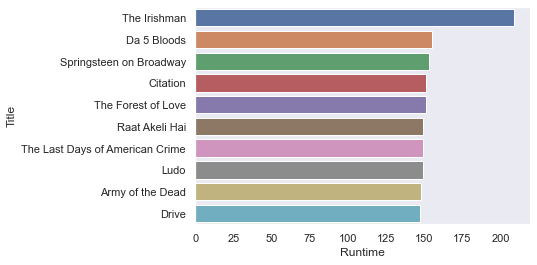

In [367]:
#En uzun 10 film
sns.barplot(data = top_ten_runtime, x="Runtime", y="Title")

In [368]:
data.sort_values(by="Premiere")

,Title,Genre,Premiere,Runtime,IMDB Score,Language
304,My Own Man,Documentary,2014-12-13,81,6.4,English
519,The Other One: The Long Strange Trip of Bob Weir,Documentary,2015-05-22,83,7.3,English
228,Hot Girls Wanted,Documentary,2015-05-29,84,6.1,English
550,"What Happened, Miss Simone?",Documentary,2015-06-26,84,7.6,English
531,Tig,Documentary,2015-07-17,80,7.4,English
...,...,...,...,...,...,...
194,Army of the Dead,Zombie/Heist,2021-05-21,148,5.9,English
245,Baggio: The Divine Ponytail,Biopic,2021-05-26,92,6.2,Italian
71,Ghost Lab,Horror,2021-05-26,117,5.2,Thai
275,Nail Bomber: Manhunt,Documentary,2021-05-26,72,6.3,English


In [375]:
data=data.astype({'Premiere': 'str'})

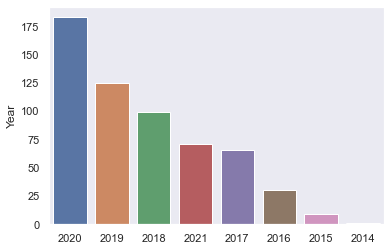

In [385]:
#Hangi yılda en fazla film yayınlanmıştır
data["Year"]=[data["Premiere"][i][0:4] for i in [*data.index]]

sns.barplot(data["Year"].value_counts().keys(), data["Year"].value_counts())
plt.show()